<a href="https://colab.research.google.com/github/TerradasExatas/fisica_experimental/blob/main/Fis_exp_mmq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dados originais: 
 [[ 0.11 11.3   0.3 ]
 [ 0.14 13.8   0.3 ]
 [ 0.16 15.5   0.5 ]
 [ 0.19 20.5   0.5 ]
 [ 0.24 23.5   0.5 ]]
Reta ajustada: 

y = 0.276  + 98.77 * x
incertezas: inc_a= 0.646 e inc_b=  4.15


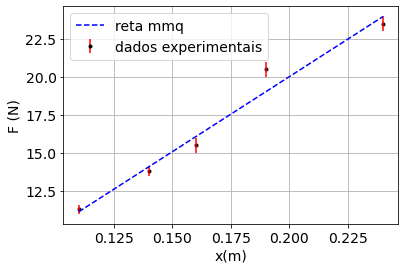

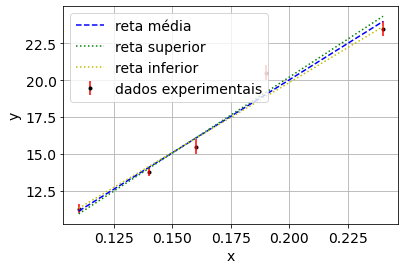

In [4]:
#Código Python para MMQ linear com incertezas em y

#http://macbeth.if.usp.br/~gusev/MMQ.pdf
#https://edisciplinas.usp.br/mod/resource/view.php?id=1557710
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importa os dados de um arquivo ou digita um exemplo com 5 pontos
dados = np.array((pd.read_csv('dados_mmq.txt', delimiter = "\s", decimal = ",")))
#dados = np.array([[0.11,11.3,0.3],[0.14,13.8,0.3],[0.16,15.5,0.5],[0.19,20.5,0.5],[0.24,23.5,0.5]])
x=dados[:,0]
y=dados[:,1]
inc_y=dados[:,2]

S1=np.sum(1/inc_y**2)
Sx=np.sum(x/inc_y**2)
Sx2=np.sum(x**2/inc_y**2)
Sxy=np.sum(x*y/inc_y**2)
Sy=np.sum(y/inc_y**2)

coef = np.zeros(2)
inc_coef = np.zeros(2)
coef[0]= (Sx2*Sy-Sx*Sxy) / (S1*Sx2-Sx**2)
coef[1]= (S1*Sxy-Sx*Sy) / (S1*Sx2-Sx**2)
inc_coef[0]=np.sqrt( Sx2 / (S1*Sx2-Sx**2) )
inc_coef[1]=np.sqrt( S1/ (S1*Sx2-Sx**2) )

x_ajuste = np.linspace(min(x),max(x),10)
y_ajuste = coef[0]+coef[1]*x_ajuste

print('dados originais: \n',dados)
print('Reta ajustada: \n')
print('y = %.3f  + %.2f * x' % (coef[0],coef[1]))
print('incertezas: inc_a= %.3f e inc_b=  %.2f' % (inc_coef[0],inc_coef[1]))

plt.rcParams.update({'font.size': 14})
plt.figure()
plt.errorbar(x,y,inc_y,fmt='k.',ecolor='r',barsabove='true',label='dados experimentais')
plt.plot(x_ajuste,y_ajuste,'b--',label='reta mmq')
plt.xlabel('x');plt.ylabel('y');plt.grid();plt.legend()

#EXTRA: retas superior e inferior
y_ajuste_sup = (coef[0]-inc_coef[0])+(coef[1]+inc_coef[1])*x_ajuste
y_ajuste_inf = (coef[0]+inc_coef[0])+(coef[1]-inc_coef[1])*x_ajuste

plt.figure()
plt.errorbar(x,y,inc_y,fmt='k.',ecolor='r',barsabove='true',label='dados experimentais')
plt.plot(x_ajuste,y_ajuste,'b--',label='reta média')
plt.plot(x_ajuste,y_ajuste_sup,'g:',label='reta superior')
plt.plot(x_ajuste,y_ajuste_inf,'y:',label='reta inferior')
plt.xlabel('x');plt.ylabel('y');plt.grid();plt.legend()